In [ ]:
pip install scikit-surprise


In [ ]:
from surprise import Reader, Dataset, SVD

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
print(movies.isnull().sum())


movieId    0
title      0
genres     0
dtype: int64


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
print(ratings.isnull().sum())


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [ ]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [ ]:
print(tags.isnull().sum())


userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [ ]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [ ]:
print(links.isnull().sum())

movieId    0
imdbId     0
tmdbId     8
dtype: int64


In [ ]:
# Merging movies, ratings and links datasets:

merged_data = pd.merge(movies, ratings, on='movieId', how='left')

In [ ]:
merged_data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09


In [ ]:
print(merged_data.isnull().sum())


movieId       0
title         0
genres        0
userId       18
rating       18
timestamp    18
dtype: int64


In [ ]:
# Create a surprise dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(merged_data[['userId', 'movieId', 'rating']], reader)

# Build the SVD model
svd = SVD()
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
# Function to predict missing ratings using SVD model
def predict_rating(row):
    return svd.predict(row['userId'], row['movieId']).est

# Replace missing ratings using collaborative filter recommender
missing_ratings = merged_data[merged_data['rating'].isnull()]
merged_data.loc[missing_ratings.index, 'rating'] = missing_ratings.apply(predict_rating, axis=1)

In [ ]:
#median_rating = merged_data['rating'].median()
#merged_data['rating'].fillna(median_rating, inplace=True)


In [ ]:
median_userId = merged_data['userId'].median()
merged_data['userId'].fillna(median_userId, inplace=True)


In [ ]:
median_timestamp = merged_data['timestamp'].median()
merged_data['timestamp'].fillna(median_timestamp, inplace=True)


In [ ]:
print(merged_data.isnull().sum())

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64


In [ ]:
unique_genres = merged_data['genres'].unique()

print(unique_genres)


['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama|Horror|Thriller' 'Comedy|Horror|Romance'


In [ ]:
unique_genres_count = merged_data['genres'].str.split('|').explode().nunique()
print("Number of unique genres:", unique_genres_count)

Number of unique genres: 20


In [ ]:
# Assuming 'merged_data' contains the DataFrame with 'movieId' and 'rating' columns

avg_highly_rated_movies = merged_data.groupby('title')['rating'].mean().sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.head(20).to_frame()

print(avg_highly_rated_movies)


                                                    rating
title                                                     
Snowflake, the White Gorilla (2011)                    5.0
Jonah Who Will Be 25 in the Year 2000 (Jonas qu...     5.0
Che: Part Two (2008)                                   5.0
Little Dieter Needs to Fly (1997)                      5.0
Entertaining Angels: The Dorothy Day Story (1996)      5.0
Cheburashka (1971)                                     5.0
Cherish (2002)                                         5.0
Moonlight                                              5.0
More (1998)                                            5.0
Junior and Karlson (1968)                              5.0
Jump In! (2007)                                        5.0
Slumber Party Massacre III (1990)                      5.0
Moscow Does Not Believe in Tears (Moskva slezam...     5.0
Guy X (2005)                                           5.0
Slumber Party Massacre II (1987)                       5

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
features = merged_data[['movieId', 'title', 'genres', 'userId', 'timestamp']]
target = merged_data['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


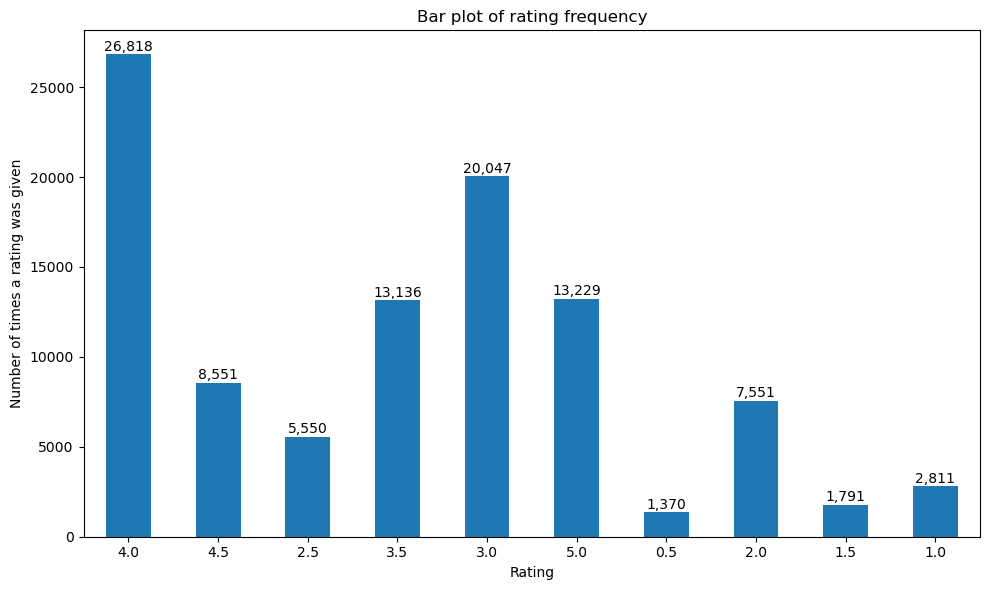

In [ ]:
# Assuming 'merged_dataset' contains the DataFrame with 'rating' column

value_counts = merged_data['rating'].value_counts(sort=False)
ax = value_counts.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Number of times a rating was given')

for i, count in enumerate(value_counts):
    ax.text(i, count + 30, f"{count:,}", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


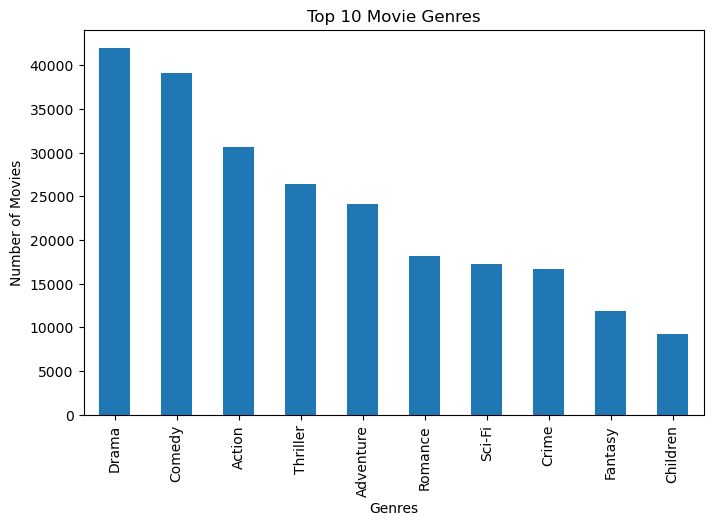

In [ ]:
top_genres = merged_data['genres'].str.split('|').explode().value_counts().nlargest(10)
plt.figure(figsize=(8, 5))
top_genres.plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.show()


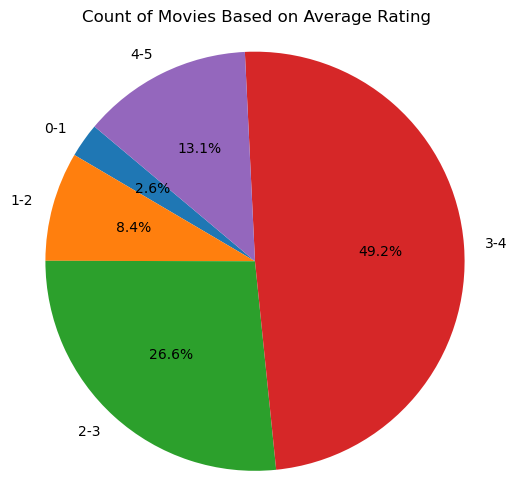

In [ ]:
# Assuming 'merged_data' contains the DataFrame with 'movieId' and 'rating' columns

movie_ratings = merged_data.groupby('movieId')['rating'].mean()
bins = [0, 1, 2, 3, 4, 5]  # Define rating bins
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']  # Labels for bins

movie_ratings_bin = pd.cut(movie_ratings, bins=bins, labels=labels)
movie_ratings_bin_counts = movie_ratings_bin.value_counts().sort_index()

plt.figure(figsize=(6, 6))  # Adjust the size here (6 inches by 6 inches)
plt.pie(movie_ratings_bin_counts, labels=movie_ratings_bin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of Movies Based on Average Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


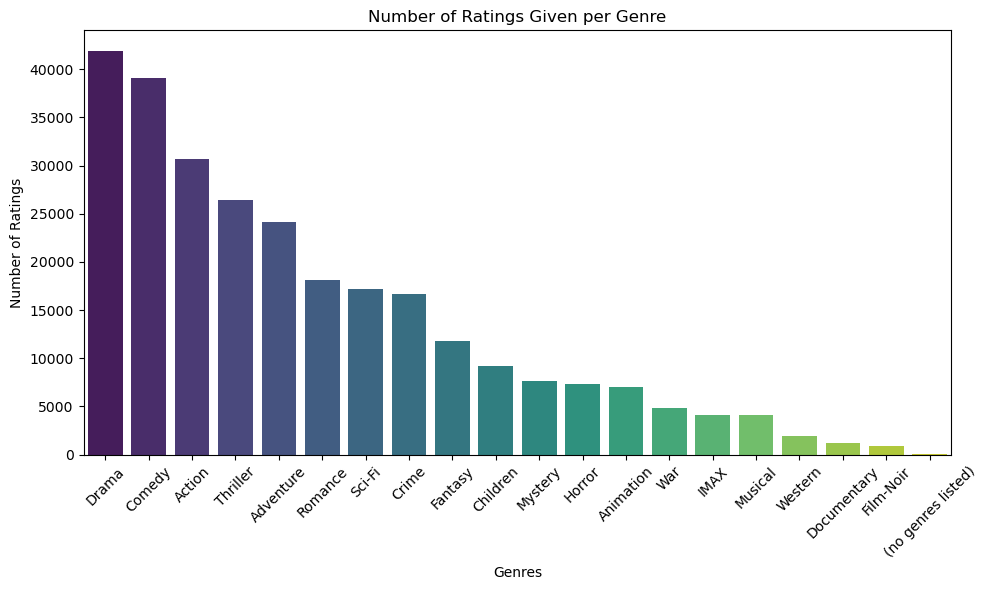

In [ ]:
genre_ratings_count = merged_data['genres'].str.split('|').explode().value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_ratings_count.index, y=genre_ratings_count.values, palette='viridis')
plt.title('Number of Ratings Given per Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


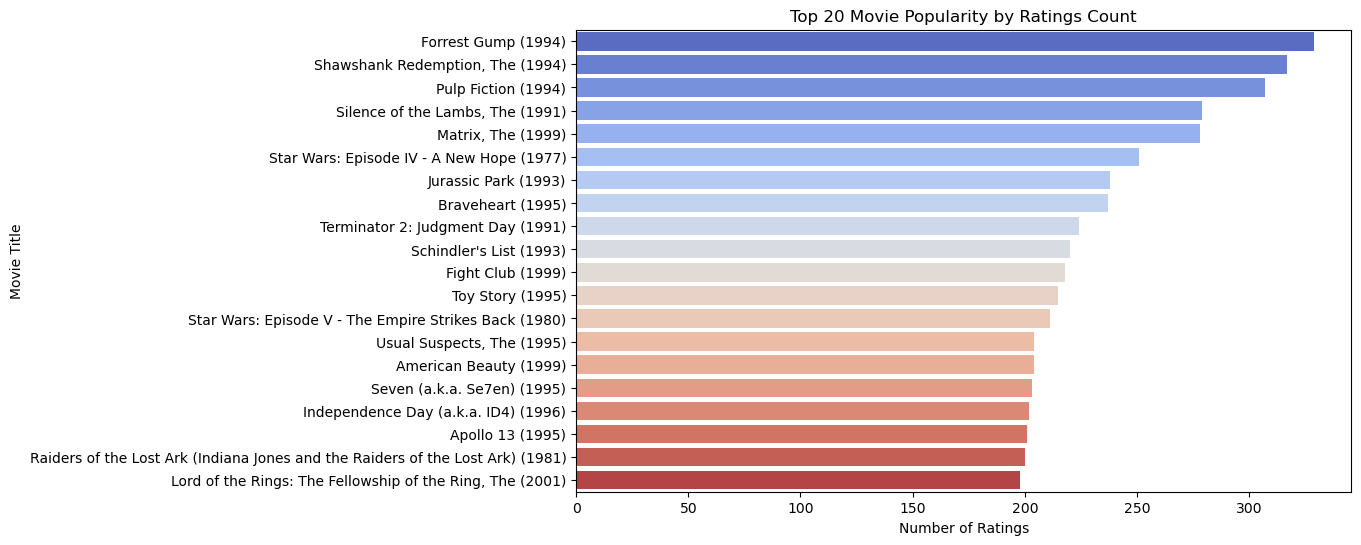

In [ ]:
movie_popularity = merged_data.groupby('title')['rating'].count().sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 6))
sns.barplot(x=movie_popularity.values, y=movie_popularity.index, palette='coolwarm')
plt.title('Top 20 Movie Popularity by Ratings Count')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()
